In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [110]:
df.shape

(10000, 14)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [112]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [113]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [114]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [115]:
df =df.drop(columns = 'RowNumber', axis = 1)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [116]:
df['Surname'].value_counts()

,count
Surname,
Smith,32
Scott,29
Martin,29
Walker,28
Brown,26
...,...
Hull,1
Sturdee,1
Flannagan,1


In [117]:
df['CustomerId'].value_counts()

,count
CustomerId,
15656710,1
15768163,1
15672754,1
15719276,1
15692664,1
...,...
15737888,1
15701354,1
15619304,1


In [118]:
df =df.drop(columns = 'CustomerId', axis = 1)
df =df.drop(columns = 'Surname', axis = 1)

In [119]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [120]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [121]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [122]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [123]:
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [124]:
df['Geography'].value_counts()

,count
Geography,
0,5014
1,2509
2,2477


In [125]:
df['Gender'].value_counts()

,count
Gender,
1,5457
0,4543


<Axes: ylabel='Geography'>

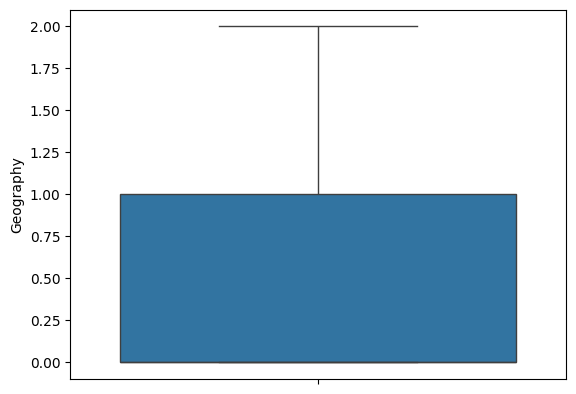

In [126]:
sns.boxplot(df['Geography'])

<Axes: ylabel='Gender'>

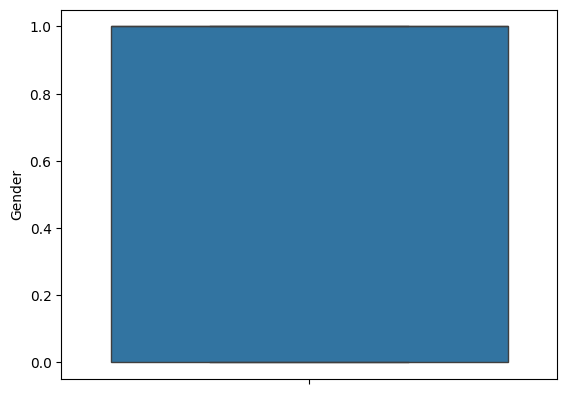

In [127]:
sns.boxplot(df['Gender'])

<Axes: ylabel='Age'>

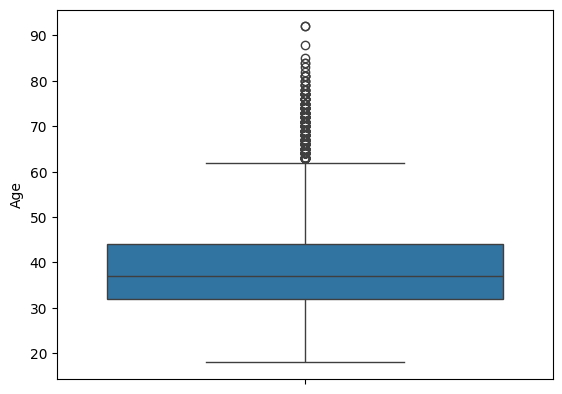

In [128]:
sns.boxplot(df['Age'])

In [129]:
Q3 = df.Age.quantile(0.75)
Q1 = df.Age.quantile(0.25)
IQR = Q3-Q1
Upper_limit = Q3+1.5*IQR
Upper_limit

np.float64(62.0)

In [130]:
df['Age']=np.where(df['Age']>Upper_limit,62.0,df['Age'])

<Axes: ylabel='Age'>

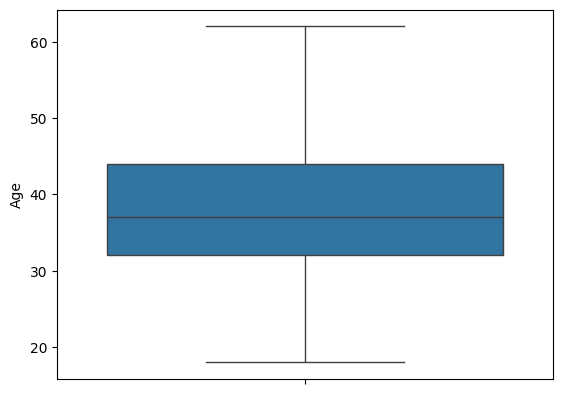

In [131]:
sns.boxplot(df['Age'])

<Axes: ylabel='Tenure'>

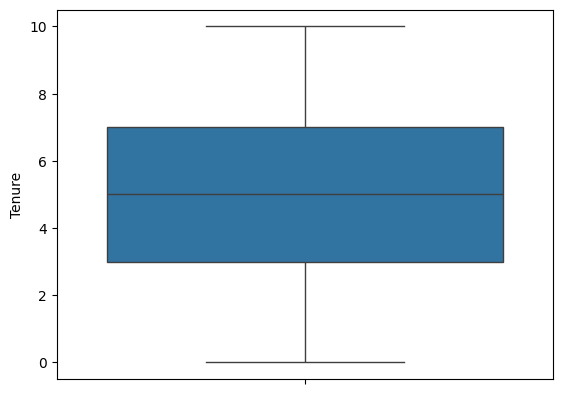

In [132]:
sns.boxplot(df['Tenure'])

<Axes: ylabel='Balance'>

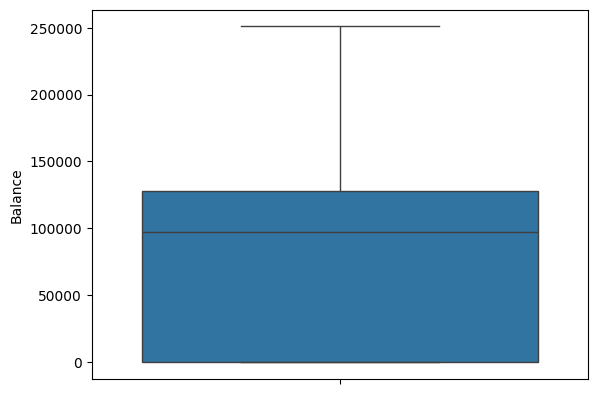

In [133]:
sns.boxplot(df['Balance'])

<Axes: ylabel='EstimatedSalary'>

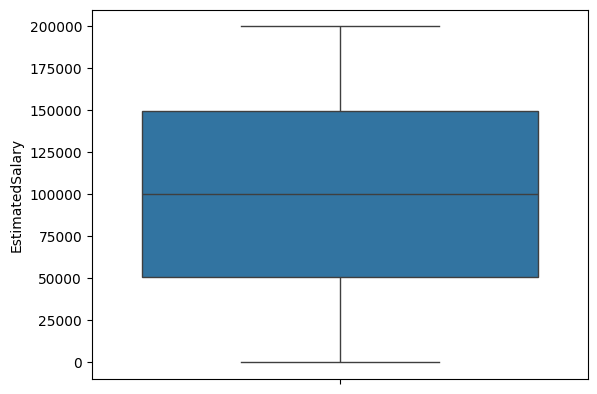

In [134]:
sns.boxplot(df['EstimatedSalary'])

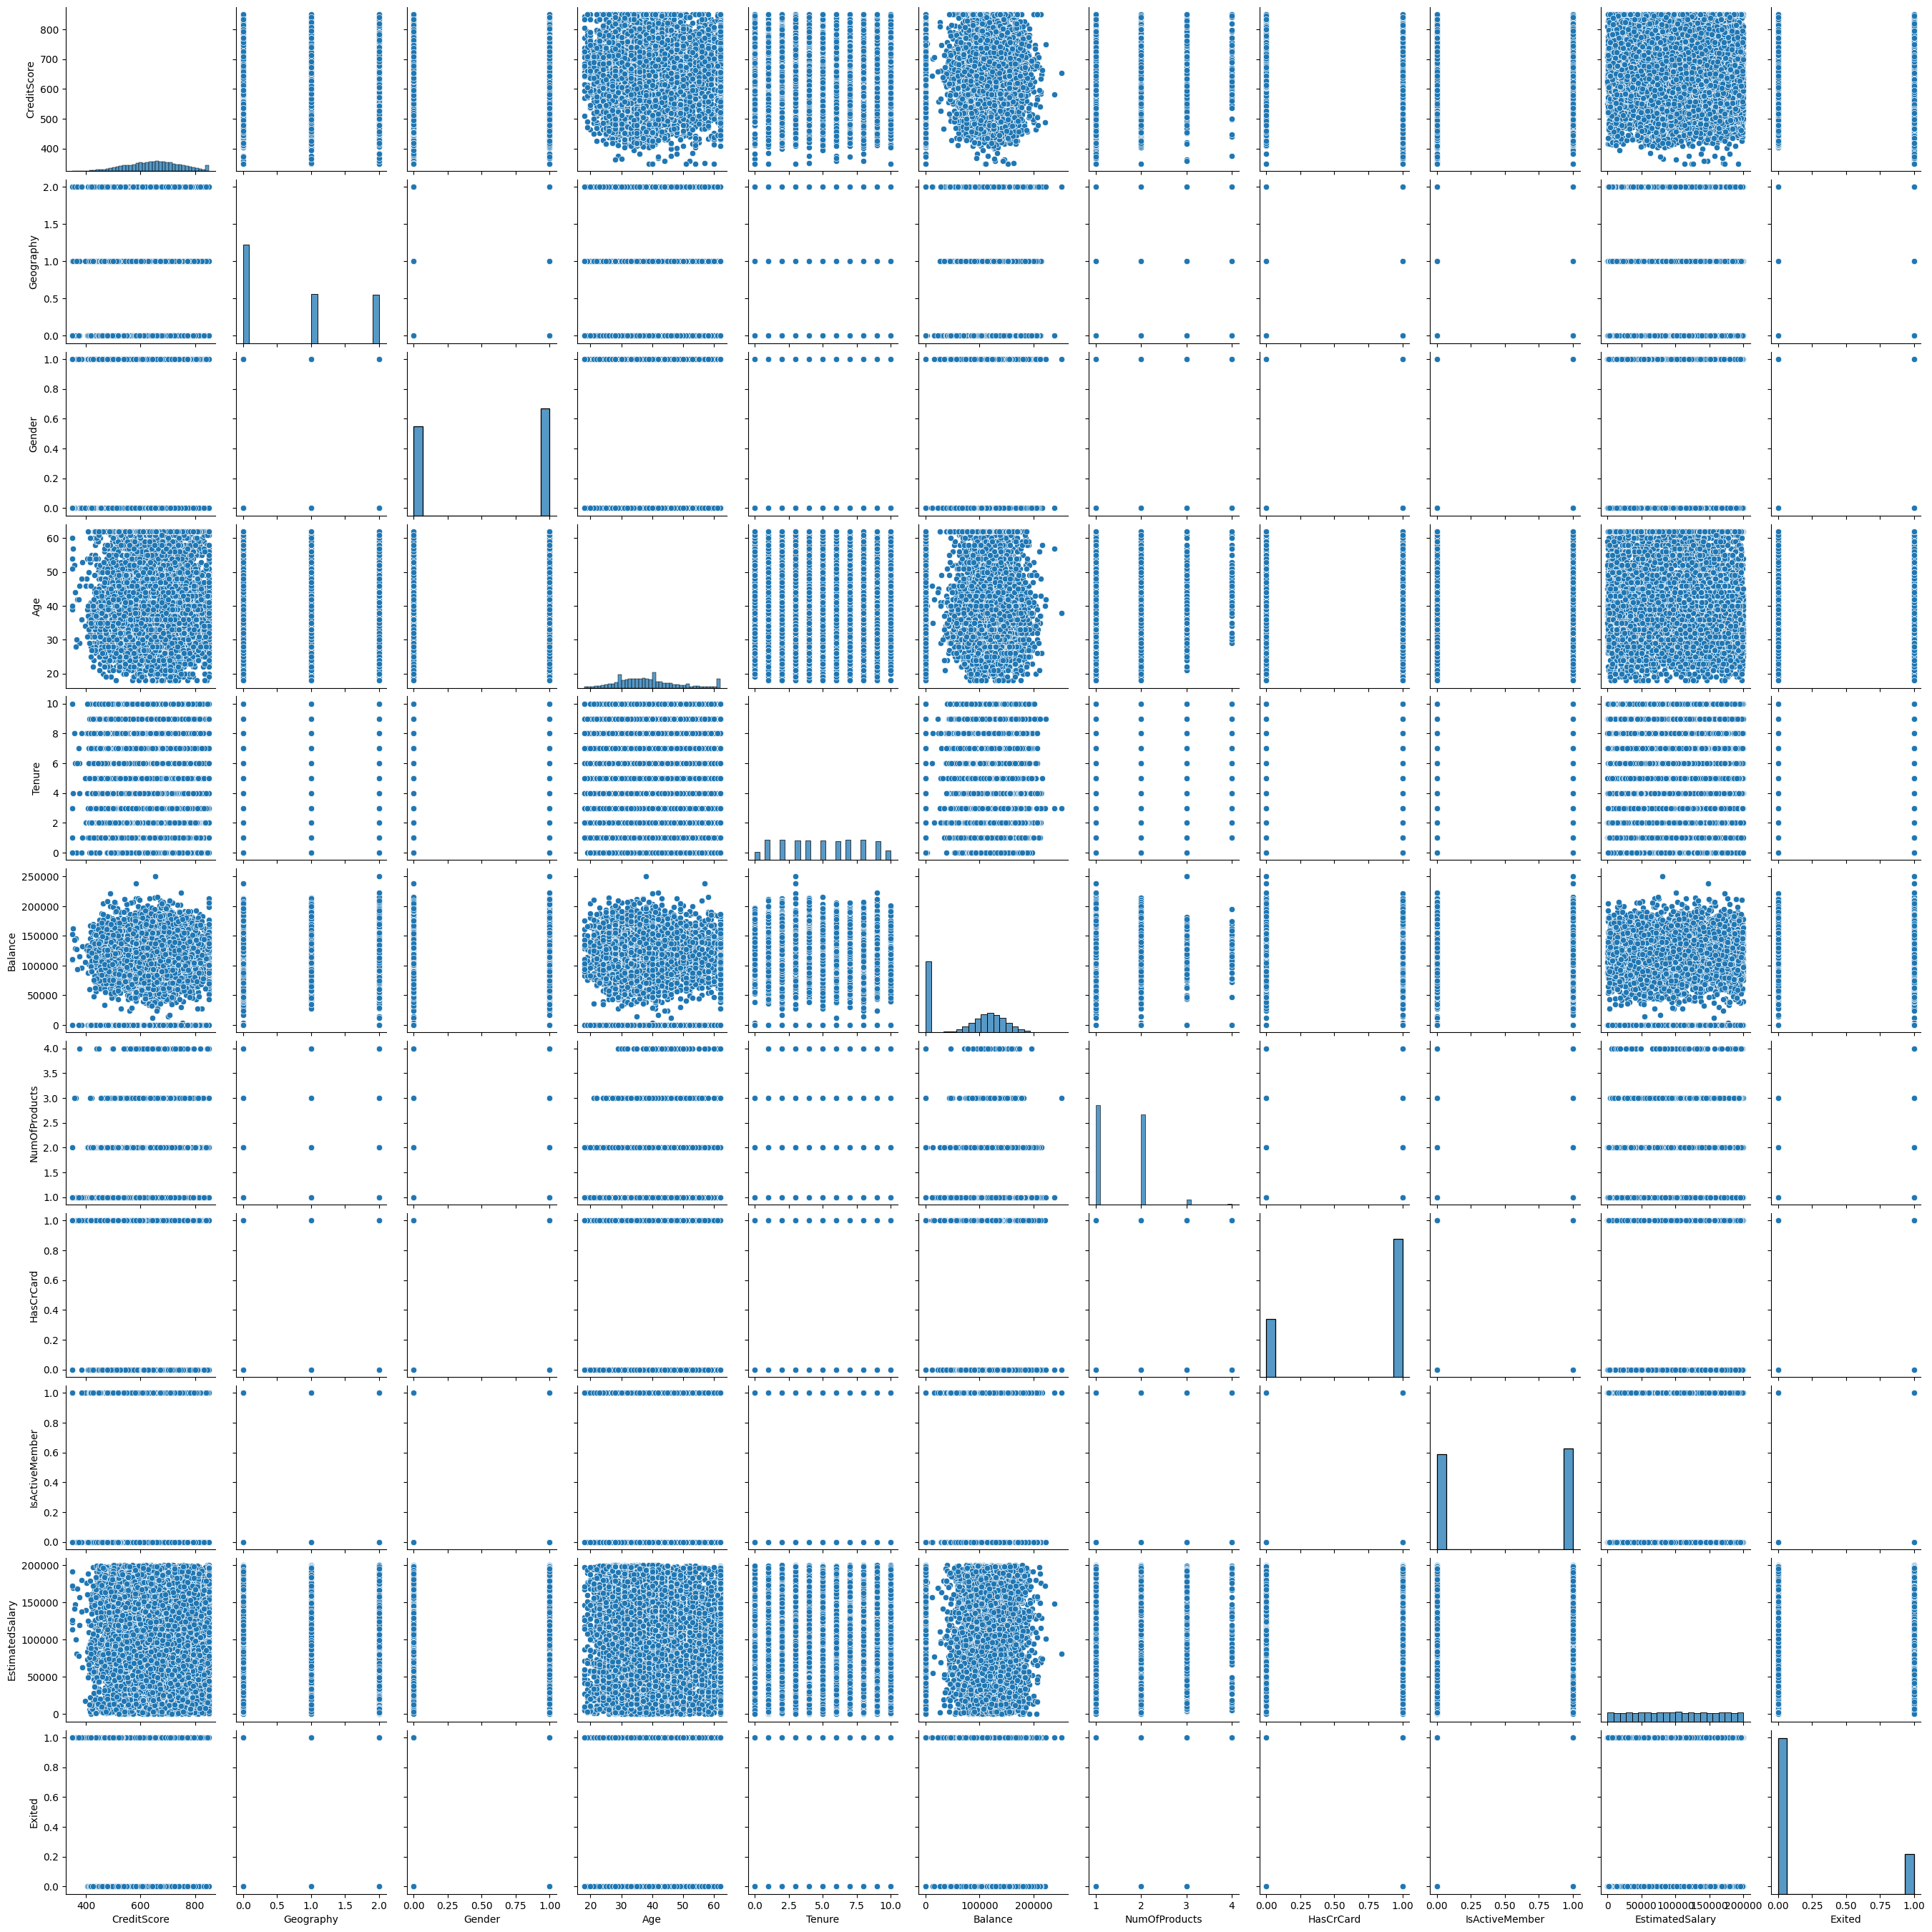

In [135]:
sns.pairplot(df)

<Axes: >

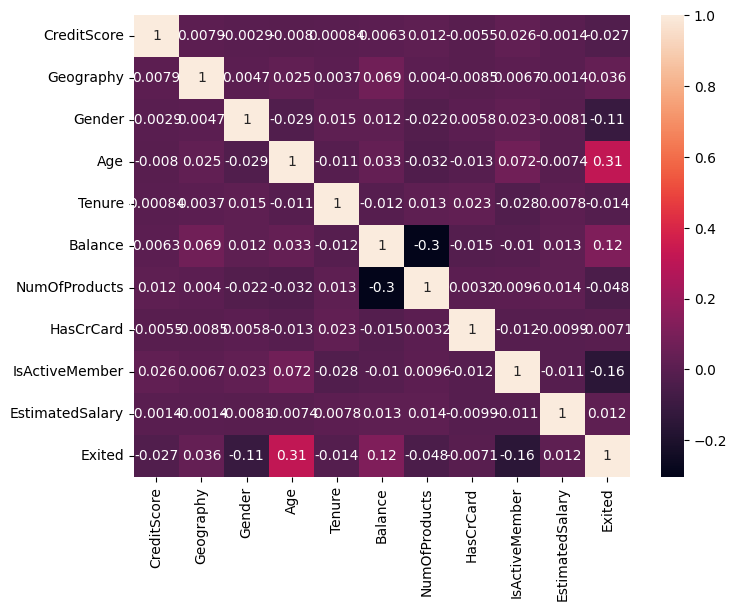

In [136]:
plt.figure(figsize =(8,6))
sns.heatmap(df.corr(), annot =True)

In [137]:
df.corr()['Exited'].sort_values(ascending= False)

,Exited
Exited,1.000000
Age,0.312436
Balance,0.118533
Geography,0.035943
EstimatedSalary,0.012097
HasCrCard,-0.007138
Tenure,-0.014001
CreditScore,-0.027094
NumOfProducts,-0.047820
Gender,-0.106512


In [138]:
x=df.iloc[:,:-1]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42.0,2,0.00,1,1,1,101348.88
1,608,2,0,41.0,1,83807.86,1,0,1,112542.58
2,502,0,0,42.0,8,159660.80,3,1,0,113931.57
3,699,0,0,39.0,1,0.00,2,0,0,93826.63
4,850,2,0,43.0,2,125510.82,1,1,1,79084.10


In [139]:
y=df.Exited
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [140]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.2,random_state = 0)

In [141]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7389,667,2,0,34.0,5,0.00,2,1,0,163830.64
9275,427,1,1,42.0,1,75681.52,1,1,1,57098.00
2995,535,0,0,29.0,2,112367.34,1,1,0,185630.76
5316,654,2,1,40.0,5,105683.63,1,1,0,173617.09
356,850,2,0,57.0,8,126776.30,2,1,1,132298.49


In [142]:
y_train.head()

,Exited
7389,0
9275,0
2995,0
5316,0
356,0


In [143]:
x_train.shape

(8000, 10)

In [144]:
x_test.shape

(2000, 10)

In [145]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()

In [146]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [147]:
x_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9394,597,1,0,35.0,8,131101.04,1,1,1,192852.67
898,523,0,0,40.0,2,102967.41,1,1,0,128702.10
2398,706,2,0,42.0,8,95386.82,1,1,1,75732.25
5906,788,0,1,32.0,4,112079.58,1,0,0,89368.59
2343,706,1,1,38.0,5,163034.82,2,1,1,135662.17


In [148]:
y_test.head()

,Exited
9394,0
898,1
2398,0
5906,0
2343,0


In [149]:
y_pred=lr.predict(x_test)
y_pred1=lr.predict(x_train)

In [150]:
from sklearn.metrics import accuracy_score
y_pred_binary = (y_pred > 0.5).astype(int)
y_pred1_binary = (y_pred1 > 0.5).astype(int)
test_acc=accuracy_score(y_test,y_pred_binary)
train_acc=accuracy_score(y_train,y_pred1_binary)
print("Accuracy score for testing data: ",test_acc)
print("Accuracy score for training data: ",train_acc)

Accuracy score for testing data:  0.7935
Accuracy score for training data:  0.795875


In [151]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,classification_report

In [152]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 0.2065
Root Mean Squared Error: 0.2065
R-squared: -0.27868725569874986


In [161]:
df.head(20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,850,2,0,43.0,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44.0,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50.0,7,0.00,2,1,1,10062.80,0
7,376,1,0,29.0,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44.0,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27.0,2,134603.88,1,1,1,71725.73,0


In [165]:
x.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42.0,2,0.00,1,1,1,101348.88
1,608,2,0,41.0,1,83807.86,1,0,1,112542.58


In [158]:
lr.predict([[384.0,1,1,48,2,8233.00,1,1,0,101348.88]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [164]:
lr.predict([[608,2,0,41.0,1,83807.86,1,0,1,112542.58]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [168]:
lr.predict([[792,1,1,52.0,3,53507.92,1,0,0,15372.54]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [169]:
lr.predict([[322,1,1,52.0,3,0.00,1,1,0,15372.54]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])